In [ ]:
#preprocessing data Visulalization is done in preporcessing.ipnyb
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasRegressor


# Suppress warnings for cleaner output
import warnings
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


warnings.filterwarnings('ignore')


In [58]:
# Load the dataset
file_path = 'london_weather 1.csv'
data = pd.read_csv(file_path)


In [59]:
# Display the first few rows
print(data.head())

# General information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())


       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341

In [60]:
# Fill missing values with the mean
data.fillna(data.mean(), inplace=True)

# Verify no missing values remain
print(data.isnull().sum())


date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64


In [61]:
# # Creating lagged features for sunshine
# data['sunshine_lag1'] = data['sunshine'].shift(1)  # Sunshine value from the previous day
# data['sunshine_lag2'] = data['sunshine'].shift(2)  # Sunshine value from two days ago

# Dropping rows with NaN values created due to lagging
data.dropna(inplace=True)
# Drop the 'snow_depth' column
data.drop(columns=['snow_depth'], inplace=True)
# Check the dataset after adding lagged features
print(data.head())


       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  
0      -7.5            0.4  101900.0  
1      -7.5            0.0  102530.0  
2      -7.2            0.0  102050.0  
3      -6.5            0.0  100840.0  
4      -1.4            0.0  102250.0  


In [62]:
# # Define features (X) and target variable (y)
# X = data[['cloud_cover', 'global_radiation', 'max_temp', 'mean_temp', 
#           'min_temp', 'precipitation', 'pressure', 'snow_depth', 
#           'sunshine_lag1', 'sunshine_lag2']]  # Include lagged features

# Define features (X) and target variable (y)
X = data[['cloud_cover', 'global_radiation', 'max_temp', 'mean_temp', 
          'min_temp', 'precipitation', 'pressure',]]  # dont include snow_depth becuase of very low correlation

y = data['sunshine']
# Shift y by 1 day to predict tomorrow's sunshine
y = y.shift(-2)

# Drop the last row as it will have NaN value after shifting
X = X[:-2]
y = y[:-2]
# Confirm dimensions
print(f"Features shape: {X.shape}, Target shape: {y.shape}")


Features shape: (15339, 7), Target shape: (15339,)


In [63]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm split
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (12271, 7), Test set size: (3068, 7)


In [64]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Confirm scaling
print("First few rows of scaled training data:")
print(X_train_scaled[:5])


First few rows of scaled training data:
[[0.88888889 0.1202046  0.42004773 0.49180328 0.52199413 0.
  0.62979684]
 [0.33333333 0.27109974 0.21002387 0.2295082  0.24046921 0.
  0.50677201]
 [0.77777778 0.30690537 0.22673031 0.25136612 0.31085044 0.
  0.56659142]
 [0.33333333 0.45780051 0.67303103 0.68032787 0.6744868  0.01618123
  0.71331828]
 [0.88888889 0.02813299 0.36754177 0.38797814 0.42521994 0.08414239
  0.64672686]]


In [65]:
# Model 1
# Initialize the model
lr = LinearRegression()

# Train the model
lr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate the model
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")


Linear Regression - RMSE: 3.55, R²: 0.22


In [66]:
# Model 2
# Initialize the Ridge Regression model
ridge = Ridge(alpha=1.0)

# Train the model
ridge.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate the model
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - RMSE: {rmse_ridge:.2f}, R²: {r2_ridge:.2f}")


Ridge Regression - RMSE: 3.55, R²: 0.22


In [67]:
# Model 3
# Initialize the Lasso Regression model
lasso = Lasso(alpha=0.1)

# Train the model
lasso.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate the model
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - RMSE: {rmse_lasso:.2f}, R²: {r2_lasso:.2f}")


Lasso Regression - RMSE: 3.57, R²: 0.21


In [68]:
# Model 4
# Initialize the Elastic Net Regression model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio balances L1 and L2 penalties

# Train the model
elastic_net.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_enet = elastic_net.predict(X_test_scaled)

# Evaluate the model
rmse_enet = mean_squared_error(y_test, y_pred_enet, squared=False)
r2_enet = r2_score(y_test, y_pred_enet)

print(f"Elastic Net Regression - RMSE: {rmse_enet:.2f}, R²: {r2_enet:.2f}")


Elastic Net Regression - RMSE: 4.01, R²: -0.00


In [69]:
# Model 5
# Initialize the Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()

# Train the model
bayesian_ridge.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_bayes = bayesian_ridge.predict(X_test_scaled)

# Evaluate the model
rmse_bayes = mean_squared_error(y_test, y_pred_bayes, squared=False)
r2_bayes = r2_score(y_test, y_pred_bayes)

print(f"Bayesian Ridge Regression - RMSE: {rmse_bayes:.2f}, R²: {r2_bayes:.2f}")


Bayesian Ridge Regression - RMSE: 3.55, R²: 0.22


In [71]:
# Model 6
# Initialize PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2)

# Transform the features
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize Linear Regression for polynomial features
lr_poly = LinearRegression()

# Train the model
lr_poly.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_poly = lr_poly.predict(X_test_poly)

# Evaluate the model
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree 2) - RMSE: {rmse_poly:.2f}, R²: {r2_poly:.2f}")


Polynomial Regression (degree 2) - RMSE: 3.50, R²: 0.24


In [72]:
# Model 7
# Initialize the Support Vector Regressor
svr = SVR(kernel='rbf')

# Train the model
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr = svr.predict(X_test_scaled)

# Evaluate the model
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - RMSE: {rmse_svr:.2f}, R²: {r2_svr:.2f}")


Support Vector Regression - RMSE: 3.56, R²: 0.21


In [73]:
# Model 8
# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Train the model
dt.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate the model
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - RMSE: {rmse_dt:.2f}, R²: {r2_dt:.2f}")


Decision Tree Regressor - RMSE: 5.02, R²: -0.57


In [74]:
# Model 9
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest Regressor - RMSE: 3.58, R²: 0.20


In [75]:
# Model 10
# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Train the model
gbr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gbr = gbr.predict(X_test_scaled)

# Evaluate the model
rmse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor - RMSE: {rmse_gbr:.2f}, R²: {r2_gbr:.2f}")


Gradient Boosting Regressor - RMSE: 3.48, R²: 0.25


In [76]:
# Model 11
# Initialize the MLP Regressor with one hidden layer
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                   max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate the model
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP Regressor - RMSE: {rmse_mlp:.2f}, R²: {r2_mlp:.2f}")
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert negative scores to positive RMSE for interpretability
rmse_scores = np.sqrt(-cv_scores)

print("\n5-Fold Cross-Validation RMSE Scores:")
print(rmse_scores)
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
print(f"Standard Deviation of RMSE: {np.std(rmse_scores):.4f}")

MLP Regressor - RMSE: 3.48, R²: 0.24

5-Fold Cross-Validation RMSE Scores:
[3.46883338 3.49034823 3.50243963 3.4946432  3.42208244]
Mean RMSE: 3.4757
Standard Deviation of RMSE: 0.0290


In [77]:
# Model 12: MLP Regressor with Two Hidden Layers
# Initialize the MLP Regressor with two hidden layers
mlp_two_hidden_layers = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam',
                                     max_iter=500, random_state=42)

# Train the model
mlp_two_hidden_layers.fit(X_train_scaled, y_train)
#
# Predict on the test set
y_pred_mlp_two_hidden_layers = mlp_two_hidden_layers.predict(X_test_scaled)

# Evaluate the model
rmse_mlp_two_hidden_layers = mean_squared_error(y_test, y_pred_mlp_two_hidden_layers, squared=False)
r2_mlp_two_hidden_layers = r2_score(y_test, y_pred_mlp_two_hidden_layers)

print(f"MLP Regressor with Two Hidden Layers - RMSE: {rmse_mlp_two_hidden_layers:.2f}, R²: {r2_mlp_two_hidden_layers:.2f}")
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(mlp_two_hidden_layers, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert negative scores to positive RMSE for interpretability
rmse_scores = np.sqrt(-cv_scores)

print("\n5-Fold Cross-Validation RMSE Scores:")
print(rmse_scores)
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
print(f"Standard Deviation of RMSE: {np.std(rmse_scores):.4f}")

MLP Regressor with Two Hidden Layers - RMSE: 3.48, R²: 0.25

5-Fold Cross-Validation RMSE Scores:
[3.45682931 3.47181059 3.48865342 3.47619434 3.4062348 ]
Mean RMSE: 3.4599
Standard Deviation of RMSE: 0.0287


In [55]:
# Model 13: Deep Neural Network using TensorFlow


# # Build the model
# model = keras.Sequential([
#     layers.Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     layers.Dense(100, activation='relu'),
#     layers.Dense(100, activation='relu'),
#     layers.Dense(100, activation='relu'),
#     layers.Dense(100, activation='relu'),
#     layers.Dense(1)  # Output layer for regression
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# # Train the model
# history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# # Predict on the test set
# y_pred_mlp_deep = model.predict(X_test_scaled).flatten()

# # Evaluate the model
# rmse_mlp_deep = mean_squared_error(y_test, y_pred_mlp_deep, squared=False)
# r2_mlp_deep = r2_score(y_test, y_pred_mlp_deep)

# print(f"Deep Neural Network (TensorFlow) - RMSE: {rmse_mlp_deep:.2f}, R²: {r2_mlp_deep:.2f}")
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse_scores = []
cv_r2_scores = []

for train_index, val_index in kf.split(X_train_scaled):
    X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Build the model
    model = keras.Sequential([
        layers.Dense(100, activation='relu', input_shape=(X_cv_train.shape[1],)),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    # Train the model
    model.fit(X_cv_train, y_cv_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)
    
    # Predict on the validation set
    y_cv_pred = model.predict(X_cv_val).flatten()
    
    # Evaluate the model
    rmse_cv = mean_squared_error(y_cv_val, y_cv_pred, squared=False)
    r2_cv = r2_score(y_cv_val, y_cv_pred)
    
    cv_rmse_scores.append(rmse_cv)
    cv_r2_scores.append(r2_cv)

# Calculate average RMSE and R-squared
avg_rmse_cv = np.mean(cv_rmse_scores)
avg_r2_cv = np.mean(cv_r2_scores)

print(f"Deep Neural Network (TensorFlow) - Average RMSE: {avg_rmse_cv:.2f}, Average R²: {avg_r2_cv:.2f}")

Epoch 1/100
277/277 [==============================] - 2s 6ms/step - loss: 14.0724 - root_mean_squared_error: 3.7513 - val_loss: 12.9900 - val_root_mean_squared_error: 3.6042
Epoch 2/100
277/277 [==============================] - 1s 5ms/step - loss: 12.5507 - root_mean_squared_error: 3.5427 - val_loss: 12.8542 - val_root_mean_squared_error: 3.5853
Epoch 3/100
277/277 [==============================] - 1s 5ms/step - loss: 12.5586 - root_mean_squared_error: 3.5438 - val_loss: 12.6453 - val_root_mean_squared_error: 3.5560
Epoch 4/100
277/277 [==============================] - 1s 5ms/step - loss: 12.4820 - root_mean_squared_error: 3.5330 - val_loss: 12.5153 - val_root_mean_squared_error: 3.5377
Epoch 5/100
277/277 [==============================] - 1s 5ms/step - loss: 12.3829 - root_mean_squared_error: 3.5189 - val_loss: 12.7601 - val_root_mean_squared_error: 3.5721
Epoch 6/100
277/277 [==============================] - 1s 4ms/step - loss: 12.4007 - root_mean_squared_error: 3.5215 - val_lo

In [78]:
# Model 13: Deep Neural Network using TensorFlow

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store RMSE and R² scores for each fold
cv_rmse_scores = []
cv_r2_scores = []

# Perform 5-fold cross-validation
for train_index, val_index in kf.split(X_train_scaled):
    X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Build the model
    model = keras.Sequential([
        layers.Dense(200, activation='relu', input_shape=(X_cv_train.shape[1],)),
        layers.Dense(200, activation='relu'),
        layers.Dense(200, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    # Train the model
    model.fit(X_cv_train, y_cv_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)
    
    # Predict on the validation set
    y_cv_pred = model.predict(X_cv_val).flatten()
    
    # Evaluate the model
    rmse_cv = mean_squared_error(y_cv_val, y_cv_pred, squared=False)
    r2_cv = r2_score(y_cv_val, y_cv_pred)
    
    cv_rmse_scores.append(rmse_cv)
    cv_r2_scores.append(r2_cv)

# Calculate average RMSE and R²
avg_rmse_cv_2 = np.mean(cv_rmse_scores)
avg_r2_cv_2 = np.mean(cv_r2_scores)

print(f"Deep Neural Network (TensorFlow) - Average RMSE: {avg_rmse_cv_2:.2f}, Average R²: {avg_r2_cv_2:.2f}")


Epoch 1/100
277/277 [==============================] - 1s 3ms/step - loss: 13.7249 - root_mean_squared_error: 3.7047 - val_loss: 13.0710 - val_root_mean_squared_error: 3.6154
Epoch 2/100
277/277 [==============================] - 1s 3ms/step - loss: 12.5723 - root_mean_squared_error: 3.5457 - val_loss: 12.6418 - val_root_mean_squared_error: 3.5555
Epoch 3/100
277/277 [==============================] - 1s 3ms/step - loss: 12.5557 - root_mean_squared_error: 3.5434 - val_loss: 12.6386 - val_root_mean_squared_error: 3.5551
Epoch 4/100
277/277 [==============================] - 1s 3ms/step - loss: 12.4987 - root_mean_squared_error: 3.5354 - val_loss: 12.8122 - val_root_mean_squared_error: 3.5794
Epoch 5/100
277/277 [==============================] - 1s 3ms/step - loss: 12.3914 - root_mean_squared_error: 3.5201 - val_loss: 12.7906 - val_root_mean_squared_error: 3.5764
Epoch 6/100
277/277 [==============================] - 1s 3ms/step - loss: 12.3525 - root_mean_squared_error: 3.5146 - val_lo

In [79]:
# K-means clustering
# Convert scaled NumPy arrays back to pandas DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_scaled_df)
    silhouette_avg = silhouette_score(X_train_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")


Optimal number of clusters: 2


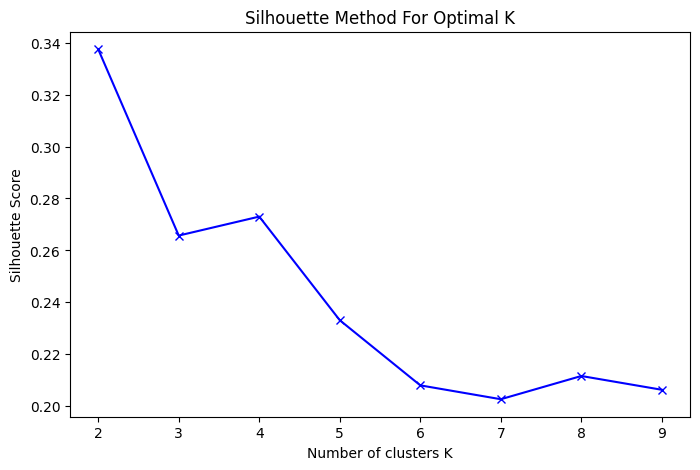

In [80]:
# Plotting silhouette scores (optional)
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal K')
plt.show()


In [81]:
# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit and predict cluster labels for training and test data
X_train_clusters = kmeans.fit_predict(X_train_scaled_df)
X_test_clusters = kmeans.predict(X_test_scaled_df)

# Add cluster labels as a new feature to the DataFrames
X_train_scaled_df['cluster'] = X_train_clusters
X_test_scaled_df['cluster'] = X_test_clusters


In [82]:
# Model 13
# Initialize the Random Forest Regressor
rf_with_clusters = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model using the new feature set with clusters
rf_with_clusters.fit(X_train_scaled_df, y_train)

# Predict on the test set
y_pred_rf_clusters = rf_with_clusters.predict(X_test_scaled_df)

# Evaluate the model
rmse_rf_clusters = mean_squared_error(y_test, y_pred_rf_clusters, squared=False)
r2_rf_clusters = r2_score(y_test, y_pred_rf_clusters)

print(f"Random Forest with Clusters - RMSE: {rmse_rf_clusters:.2f}, R²: {r2_rf_clusters:.2f}")

# Compare with the original Random Forest model
print(f"Original Random Forest - RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest with Clusters - RMSE: 3.58, R²: 0.20
Original Random Forest - RMSE: 3.58, R²: 0.20


In [83]:
# Model 14 
# Baseline Mean Regressor
# Calculate the mean of the target variable from the training set
mean_sunshine = y_train.mean()

# Predict the mean for all instances in the test set
y_pred_mean = np.full_like(y_test, fill_value=mean_sunshine)

# Evaluate the model
rmse_mean = mean_squared_error(y_test, y_pred_mean, squared=False)
r2_mean = r2_score(y_test, y_pred_mean)

print(f"Baseline Mean Regressor - RMSE: {rmse_mean:.2f}, R²: {r2_mean:.2f}")


Baseline Mean Regressor - RMSE: 4.01, R²: -0.00


In [84]:
# Create a dictionary to store the results
model_results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression',
              'Bayesian Ridge Regression', 'Polynomial Regression', 'Support Vector Regression',
              'Decision Tree Regressor', 'Random Forest Regressor', 'Random Forest with Clusters',
              'Gradient Boosting Regressor', 'MLP Regressor', 'MLP Regressor with Two Hidden Layers',
              'Deep Neural Network (TensorFlow)', 'Deep Neural Network 2 (TendorFlow)', 'Baseline Mean Regressor'],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_enet, rmse_bayes, rmse_poly, rmse_svr,
             rmse_dt, rmse_rf, rmse_rf_clusters, rmse_gbr, rmse_mlp, rmse_mlp_two_hidden_layers,
             avg_rmse_cv, avg_rmse_cv_2, rmse_mean],
    'R2_Score': [r2_lr, r2_ridge, r2_lasso, r2_enet, r2_bayes, r2_poly, r2_svr,
                 r2_dt, r2_rf, r2_rf_clusters, r2_gbr, r2_mlp, r2_mlp_two_hidden_layers,
                 avg_r2_cv, avg_r2_cv_2, r2_mean]
}

# Create a DataFrame
results_df = pd.DataFrame(model_results)

# Display the results
print(results_df)


                                   Model      RMSE  R2_Score
0                      Linear Regression  3.546498  0.216711
1                       Ridge Regression  3.546102  0.216886
2                       Lasso Regression  3.571269  0.205731
3                 Elastic Net Regression  4.007805 -0.000312
4              Bayesian Ridge Regression  3.546088  0.216892
5                  Polynomial Regression  3.495107  0.239247
6              Support Vector Regression  3.561711  0.209977
7                Decision Tree Regressor  5.023498 -0.571575
8                Random Forest Regressor  3.577078  0.203145
9            Random Forest with Clusters  3.575192  0.203985
10           Gradient Boosting Regressor  3.477923  0.246710
11                         MLP Regressor  3.482761  0.244612
12  MLP Regressor with Two Hidden Layers  3.478283  0.246554
13      Deep Neural Network (TensorFlow)  3.530901  0.232922
14    Deep Neural Network 2 (TendorFlow)  3.473554  0.257614
15               Baselin

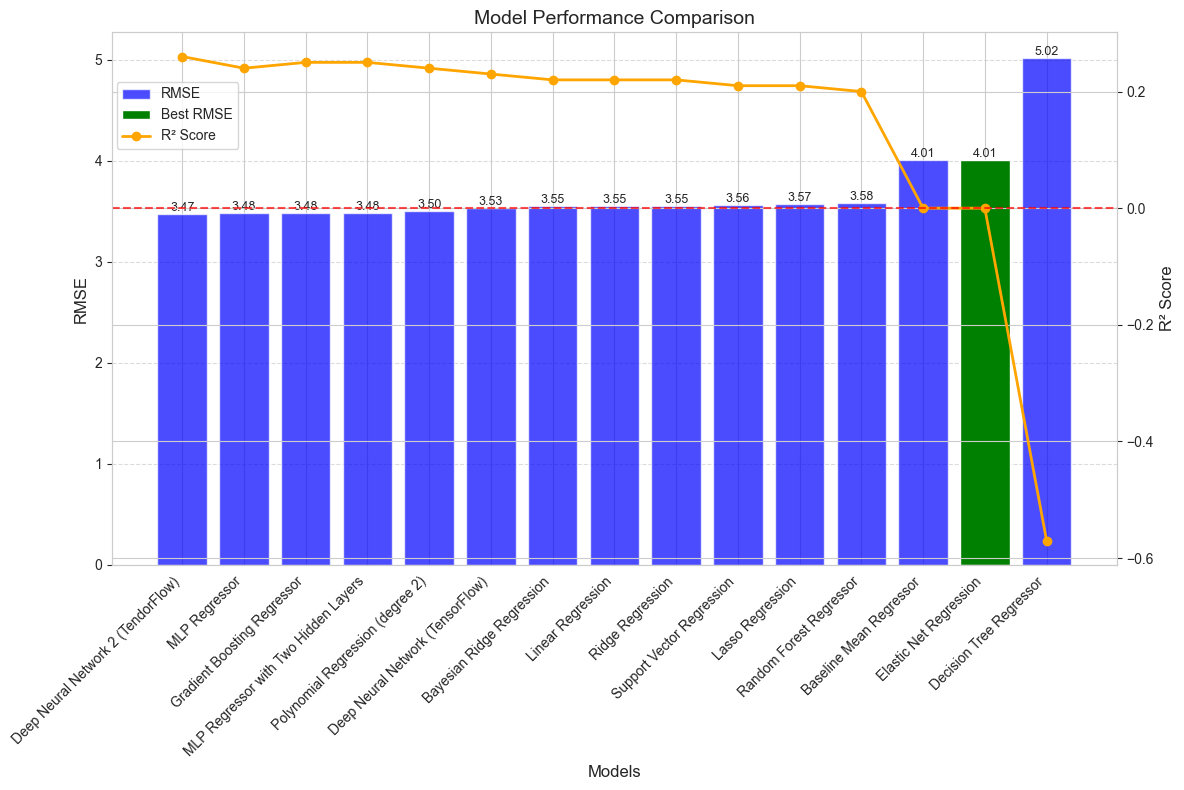

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    "Model": [
        "Linear Regression", "Ridge Regression", "Lasso Regression",
        "Elastic Net Regression", "Bayesian Ridge Regression",
        "Polynomial Regression (degree 2)", "Support Vector Regression",
        "Decision Tree Regressor", "Random Forest Regressor",
        "Gradient Boosting Regressor", "MLP Regressor",
        "MLP Regressor with Two Hidden Layers",
        "Deep Neural Network (TensorFlow)",
        "Deep Neural Network 2 (TendorFlow)", "Baseline Mean Regressor"
    ],
    "RMSE": [3.55, 3.55, 3.57, 4.01, 3.55, 3.5, 3.56, 5.02, 3.58, 3.48, 3.48, 3.48, 3.53, 3.47, 4.01],
    "R²": [0.22, 0.22, 0.21, 0.0, 0.22, 0.24, 0.21, -0.57, 0.2, 0.25, 0.24, 0.25, 0.23, 0.26, 0.0]
}

df = pd.DataFrame(data)

# Sort data by RMSE for better visualization
df = df.sort_values(by="RMSE", ascending=True)

# Create figure
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for RMSE
bars = ax1.bar(df["Model"], df["RMSE"], color="blue", alpha=0.7, label="RMSE")
ax1.set_ylabel("RMSE", fontsize=12)
ax1.set_xlabel("Models", fontsize=12)
ax1.set_title("Model Performance Comparison", fontsize=14)
ax1.set_xticks(range(len(df["Model"])))
ax1.set_xticklabels(df["Model"], rotation=45, ha="right", fontsize=10)
ax1.tick_params(axis="y", labelsize=10)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Highlight the best RMSE model
min_rmse_idx = df["RMSE"].idxmin()
ax1.bar(df["Model"].iloc[min_rmse_idx], df["RMSE"].iloc[min_rmse_idx], color="green", label="Best RMSE")

# Add data labels for RMSE
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2f}",
             ha="center", va="bottom", fontsize=9)

# Add a secondary y-axis for R²
ax2 = ax1.twinx()
r2_line, = ax2.plot(df["Model"], df["R²"], color="orange", marker="o", linewidth=2, label="R² Score")
ax2.set_ylabel("R² Score", fontsize=12)
ax2.tick_params(axis="y", labelsize=10)
ax2.axhline(0, color="red", linestyle="--", alpha=0.7)  # Add baseline for R²

# Add legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), fontsize=10)
plt.tight_layout()

plt.show()
